#<strong> 데이터 EDA </strong>

- 감정이 라벨링된 한국어 연속성 대화, 단발성 대화, 욕설 감지 데이터셋
 - 연속성 대화 : 
    https://aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=86
  - 단발성 대화 :
    https://github.com/JH-lee95/Korean-Sentiments-Classification
  -욕설 표현 :
    https://github.com/2runo/Curse-detection-data


- 욕설 데이터셋과 혐오 데이터 사이의 코사인 유사도 비교
  
  : 욕설 데이터셋을 혐오 데이터에 포함시키는 근거로서 활용

- 모델링에 사용하는 데이터셋(세 가지 데이터 혼합)에 대한 EDA
  > 데이터셋의 문장 길이 분포
  
  > 분류 감정 비율 시각화
  


In [ ]:
# 한글깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/dejavu: skipping, looped directory detected
/usr/share/fonts/truetype

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 혐오 데이터와 욕설 데이터 불러오기

# 혐오 데이터가 포함되어 있는 단발성 대화 데이터셋
short_raw = pd.read_excel('/content/drive/MyDrive/data/short_raw.xlsx')
short_raw = pd.DataFrame(short_raw)

In [ ]:
short_raw

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,공포
1,그냥 내 느낌일뿐겠지?,공포
2,아직너무초기라서 그런거죠?,공포
3,유치원버스 사고 낫다던데,공포
4,근데 원래이런거맞나요,공포
...,...,...
38589,솔직히 예보 제대로 못하는 데 세금이라도 아끼게 그냥 폐지해라..,혐오
38590,재미가 없으니 망하지,혐오
38591,공장 도시락 비우생적임 아르바이트했는데 화장실가성 손도 않씯고 재료 담고 바닥 떨어...,혐오
38592,코딱지 만한 나라에서 지들끼리 피터지게 싸우는 센징 클래스 ㅉㅉㅉ,혐오


In [ ]:
# 혐오에 해당하는 데이터만 불러오기
disgust = short_raw[short_raw.Emotion == '혐오']
disgust.head()

,Sentence,Emotion
33165,저러니까 자신보다 어린 사람한테 미개하다는 소리듣지,혐오
33166,세금을 쳐 내라 양아치들아,혐오
33167,댓글창 냄비근성 토나온다 진짜,혐오
33168,3개월 계약은 뭐하자는 얘기지?,혐오
33169,소녀시대 미국인 티파니를 국내에서 추방해라,혐오


In [ ]:
# 욕설 감지 데이터셋
hate = pd.read_table('/content/drive/MyDrive/data/hate.txt', sep='/t')
hate.head()

<ipython-input-6-4857fdcaaae7>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  hate = pd.read_table('/content/drive/MyDrive/Colab Notebooks/Final_project/data/hate.txt', sep='/t')


,Sentence
0,좌배 까는건 ㅇㅂ|1
1,집에 롱 패딩만 세 개다. 10년 더 입어야지 ㅋㅋ|0
2,개소리야 니가 빨갱이를 옹호하고 드루킹을 ㅇㅇ짓이라고 말못해서 삐진거야 빨갱아|1
3,세탁이라고 봐도 된다|0
4,애새끼가 초딩도 아니고 ㅋㅋㅋㅋ |1


In [ ]:
# 욕설 감지 데이터셋 전처리
hate[hate['Sentence'].str.contains("t|0")]

,Sentence
1,집에 롱 패딩만 세 개다. 10년 더 입어야지 ㅋㅋ|0
3,세탁이라고 봐도 된다|0
9,은행에 대출 상담 받으러 가보면 직업의 귀천 바로 알려줌|0
10,ㅋㅋㅋㅋㅋ|0
11,ㄹㅇㅋㅋㅋ|0
...,...
5818,이쯤되니 전남대 전북대 상황이 궁금해지네 |0
5819,WIN10 업그레이드 했냐??|0
5820,좌우 헬파이어 3개씩 6개 장착에 아파치보다 약하지만 20mm 기관포 장착임|0
5822,너가 한 말 중에|0


In [ ]:
# 혐오 구분은 0과 1로 되어있음, 0에 해당하는 데이터 드롭
idx3 = hate[hate['Sentence'].str.contains("t|0")].index

In [ ]:
hate.drop(idx3, inplace=True)

In [ ]:
hate.reset_index(drop=True)

,Sentence
0,좌배 까는건 ㅇㅂ|1
1,개소리야 니가 빨갱이를 옹호하고 드루킹을 ㅇㅇ짓이라고 말못해서 삐진거야 빨갱아|1
2,애새끼가 초딩도 아니고 ㅋㅋㅋㅋ |1
3,731부대의 후예라 그런지 가학적인 아이디어는 세계최고임 이래서 애교만 떨어도 돈 ...
4,재앙이한건햇노|1
...,...
1938,응 그래 저능아새끼야 그렇게 생각하고 살렴. 저능아는 저능아대로살아야지 시발 불끄는...
1939,진짜 저 개성없는 머리는 왜 하는거냐|1
1940,오나1홀도 애1무 잘해주면 물 나온다 함 해보라ㅏ|1
1941,"세금 내놓으라고 데모질 중 ㅋㅋ간첩, 도둑놈 새끼들이 대통령 해처먹으니까 나도 같..."


In [ ]:
Sentence_1 = hate.Sentence
hate['Sentence'] = Sentence_1.str.split('|').str[0]

In [ ]:
hate['Emotion'] = Sentence_1.str.split('|').str[1]

In [ ]:
hate.reset_index(drop=True)

,Sentence,Emotion
0,좌배 까는건 ㅇㅂ,1
1,개소리야 니가 빨갱이를 옹호하고 드루킹을 ㅇㅇ짓이라고 말못해서 삐진거야 빨갱아,1
2,애새끼가 초딩도 아니고 ㅋㅋㅋㅋ,1
3,731부대의 후예라 그런지 가학적인 아이디어는 세계최고임 이래서 애교만 떨어도 돈 ...,1
4,재앙이한건햇노,1
...,...,...
1938,응 그래 저능아새끼야 그렇게 생각하고 살렴. 저능아는 저능아대로살아야지 시발 불끄는...,1
1939,진짜 저 개성없는 머리는 왜 하는거냐,1
1940,오나1홀도 애1무 잘해주면 물 나온다 함 해보라ㅏ,1
1941,"세금 내놓으라고 데모질 중 ㅋㅋ간첩, 도둑놈 새끼들이 대통령 해처먹으니까 나도 같...",1


In [ ]:
# label==1을 욕설로 바꿔주기
hate.loc[hate['Emotion']== '1', 'Emotion'] = '욕설'

In [ ]:
hate.head()

,Sentence,Emotion
0,좌배 까는건 ㅇㅂ,욕설
2,개소리야 니가 빨갱이를 옹호하고 드루킹을 ㅇㅇ짓이라고 말못해서 삐진거야 빨갱아,욕설
4,애새끼가 초딩도 아니고 ㅋㅋㅋㅋ,욕설
5,731부대의 후예라 그런지 가학적인 아이디어는 세계최고임 이래서 애교만 떨어도 돈 ...,욕설
6,재앙이한건햇노,욕설


In [ ]:
hate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1943 entries, 0 to 5824
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  1943 non-null   object
 1   Emotion   1943 non-null   object
dtypes: object(2)
memory usage: 45.5+ KB


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import glob
import os
import sklearn
import nltk

In [ ]:
# 데이터 정제
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk python-dev python3-dev
!pip3 install JPype1
!pip3 install konlpy
!pip3 install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,255 kB]
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,354 kB]
Fetched 4,945 kB in 3s (1,45

In [ ]:
from konlpy.tag import Komoran

In [ ]:
# 불용어 목록 데이터 불러오기(txt파일을 csv 형식으로 읽기)
stopwords = pd.read_csv('/content/drive/MyDrive/data/stopwords(new).txt', delimiter = '\t', names=['stopword', 's', 'n'])
stopwords

,stopword,s,n
0,이,VCP,0.018280
1,있,VA,0.011699
2,하,VV,0.009774
3,것,NNB,0.009733
4,들,XSN,0.006898
...,...,...,...
95,원,NNB,0.000492
96,잘,MAG,0.000491
97,통하,VV,0.000487
98,소리,NNG,0.000486


In [ ]:
# 데이터 프레임 정제 함수
def make_list(data):
  a = data['Sentence'].tolist()
  b = []
  for i in a:
    b.append(i)
  return b

In [ ]:
disgust = make_list(disgust)
disgust

['저러니까 자신보다 어린 사람한테 미개하다는 소리듣지',
 '세금을 쳐 내라 양아치들아',
 '댓글창 냄비근성 토나온다 진짜',
 '3개월 계약은 뭐하자는 얘기지?',
 '소녀시대 미국인 티파니를 국내에서 추방해라',
 '보수단체라 부르지마라. 그게 어디 보수냐, 알바단체지 !!!',
 '유인나 얼굴이 한겹 더있는거 같다.',
 '잠수함은 아닌거같은데 상대가 워낙 구라쟁이 방산비리 집단이라 누구맞는지 모르겠다',
 '대한민국 제일 개 쓰레기를 대통령으로 뽑은 인간들아 반성해라',
 '갈등조장 더럽게 하네 기레기',
 '삼성의 머슴새끼',
 '삼성 최순실딱가리....',
 '갤레기가 쏘아올린 작은 손모가지',
 '지네 엄마처럼 역겹게 생겻네',
 '답답하다 ... 정부는 뭐하는 집단인지',
 '이거 인정되면 전세계가 개판된다. 정말 철면피네~',
 '에반게리온이나 만들어라',
 '럼프야 이왕하는김에 닭사모틀니랑 일베충으로 가득한 헬반도 좀 날려버려라',
 '생긴거바라 진실되게 생기질 않앗잖냐',
 '미국 통신사 노트7 영구퇴출 한다네 폭탄은 그래야지',
 '황우석을 잇는 대국민 사기극',
 '니년이 나쁜년이다',
 '누구를위한 경찰이냐 박근혜의 경찰은 해산하라',
 '블랙리스트는 내란죄다.',
 '재수없는년 꼴보기 싫다',
 '에라이 개돼지보다 못한 새 끼 야',
 '국민들 피를 빨아먹은년들',
 '아무리 그래봤자 필사람은 다핀다',
 '이런건 실제로 보면 티 확난다 사진빨',
 '종북방송국 jtbc',
 '이거 완전 미칬네!',
 '이래서 힙합이 문제야',
 '선동도 이정도면 의도적이다',
 '저짓거리하느라 대포폰 쓸수밖에. 법대로 처리하라',
 '음... 불매운동 한번 거하게 해야겠군.',
 '인터넷 좀 하다 밥먹으려고 했는데 이기사 보고나니 밥맛 떨어지노..',
 '짤릴거 대비해서 스스로 위안하는 속좁은 인간',
 '안 걸릴거라고 생각하는 게 더 웃기네!',
 '어쩐지 맹장수술 이후로 몸이 안 아픈 데가 없다했더니...',
 '종북 문죄인을 탓하지 않는 

In [ ]:
hate = make_list(hate)
hate

['좌배 까는건 ㅇㅂ',
 '개소리야 니가 빨갱이를 옹호하고 드루킹을 ㅇㅇ짓이라고 말못해서 삐진거야 빨갱아',
 '애새끼가 초딩도 아니고 ㅋㅋㅋㅋ ',
 '731부대의 후예라 그런지 가학적인 아이디어는 세계최고임 이래서 애교만 떨어도 돈 벌리는 한국에 기를 써서 진출하려고 하지조센남자들은 또 이쁜여자만 보면 사족을 못쓰며 공주대접해주는 놈들이니',
 '재앙이한건햇노',
 '글쓴이 와꾸 승리에 비하면 방사능 피폭 원숭이 일듯..',
 '마 씨발련 아 몇평이고 맷개드갔노 니 대하이햄하고 해밨나',
 "꽃다발사들고 알바하는곳찾아가서 무릎꿇고 '내 마음을 받아줄래 지영아?' 하면 바로 넘어온다 여자들 이런거 존나좋아함",
 '박근혜 안빠는데  보수통합 3원칙 인정함 ',
 '뭐저런 골빈 ㄴ이 다있냐 ㅋㅋㅋ 저런게 학원강사라고? 애들이 불쌍',
 '정신병자 천국이구나',
 '깍새들이 시발 존나강요하더라',
 '리뷰쓴 새끼가 쓰레기 맞지저건 ㅋㅋㅋ 존나 악랄하게 사진찍어 올리는데',
 '틀딱 씨발새끼들아 다꺼져라 냄새나니까',
 '내가 세금 안내면 너 같은 동사무소에서 프린트나 하는 새끼는 월급 못받고 굶어 뒈져야 돼 병신새끼야.',
 '원래 수준이 그래',
 '전에 제주도 여행 갔는데 폭포 앞에 사진 잘나오는 포토존에서 사진 찍는거 기다렸는데 앞의 6명의 짱게이 때문에 짜증남먼저 6명 각자 한장씩 찍음다음 번갈아 가면서 둘이나  셋이서 짝 지어서 찍음 정말 끝나서 싶어 찍을려고 하니 그  6명이 다 모여서 포즈 바꿔가면서 또 사진 찍음이지랄 하고 있음',
 '짱깨들 말하는 거임? 짱깨국이 무상의료라고?',
 '빡대가리들에게 방법을 가르쳐주시면 ㅠㅜ',
 '시발 정작 지네들 자식은 몸쓰는일 안시킬거면서 개지랄떠네 ㅋㅋㅋ',
 '니들 틀딱들 닭빨고 진빨고 중국빨고 그때그때 빠는새끼들임 닭이 친중하면 중국도 빨고 오성홍기절하고 아님? 억울하면 논리적으로 반박을 해 ㅋ',
 '꼴리지는 않고 그냥 존나 귀엽다 ',
 '크로캅이 본야스키 개털던거 생각나네 ㅋㅋㅋㅋㅋㅋ진짜 개잡듯 

In [ ]:
doc_df = pd.DataFrame({'filename':['혐오', '욕설'],
                       'sentence':[disgust, hate]})

In [ ]:
혐오 = ' '.join(doc_df['sentence'][0])
욕설 = ' '.join(doc_df['sentence'][1])

In [ ]:
doc_df = pd.DataFrame({'filename':['혐오', '욕설'],
                       'sentence':[혐오, 욕설]})
doc_df

,filename,sentence
0,혐오,저러니까 자신보다 어린 사람한테 미개하다는 소리듣지 세금을 쳐 내라 양아치들아 댓글...
1,욕설,좌배 까는건 ㅇㅂ 개소리야 니가 빨갱이를 옹호하고 드루킹을 ㅇㅇ짓이라고 말못해서 삐...


In [ ]:
a = make_list(행복)
b = make_list(놀람)
c = make_list(분노)
d = make_list(공포)
e = make_list(혐오)
f = make_list(슬픔)
g = make_list(중립)

In [ ]:
행복 = short_raw[short_raw['Emotion'] == '행복']
놀람 = short_raw[short_raw['Emotion'] == '놀람']
분노 = short_raw[short_raw['Emotion'] == '분노']
공포 = short_raw[short_raw['Emotion'] == '공포']
혐오 = short_raw[short_raw['Emotion'] == '혐오']
슬픔 = short_raw[short_raw['Emotion'] == '슬픔']
중립 = short_raw[short_raw['Emotion'] == '중립']

In [ ]:
doc_df = pd.DataFrame({'filename':['행복', '놀람', '분노', '공포', '혐오', '슬픔', '중립', '욕설'],
                       'sentence':[a, b, c, d, e, f, g, hate]})

In [ ]:
행복 = ' '.join(doc_df['sentence'][0])
놀람 = ' '.join(doc_df['sentence'][1])
분노 = ' '.join(doc_df['sentence'][2])
공포 = ' '.join(doc_df['sentence'][3])
혐오 = ' '.join(doc_df['sentence'][4])
슬픔 = ' '.join(doc_df['sentence'][5])
중립 = ' '.join(doc_df['sentence'][6])
욕설 = ' '.join(doc_df['sentence'][7])

In [ ]:
doc_df = pd.DataFrame({'filename':['행복', '놀람', '분노', '공포', '혐오', '슬픔', '중립', '욕설'],
                       'sentence':[행복, 놀람, 분노, 공포, 혐오, 슬픔, 중립, 욕설]})

In [ ]:
doc_df

,filename,sentence
0,행복,유재석 오라버니 해피투게더 봤어요 우리모두 준혁이성과 LG선수들이 선전할수 있게 기...
1,놀람,7로 나온다든데 아니었나 의사양반 내가고자라니! 이 사람 얼굴이 약간 전라도 사람...
2,분노,서해 수자원도 한류라서 그동안 불법조업 방치했나? 니가 인간이가. 강아지를 때리고...
3,공포,언니 동생으로 부르는게 맞는 일인가요..?? 그냥 내 느낌일뿐겠지? 아직너무초기라서...
4,혐오,저러니까 자신보다 어린 사람한테 미개하다는 소리듣지 세금을 쳐 내라 양아치들아 댓글...
5,슬픔,어깨라도넓엇으면 옷빨이라도 잘살텐데.. 그저 보고싶어죽겟어요 아 진짜 저한테는 악...
6,중립,소량은 먹어도 인체에 해롭지 않고요. 그래도 청문회 나온 놈들보다는 정직한 대답 ...
7,욕설,좌배 까는건 ㅇㅂ 개소리야 니가 빨갱이를 옹호하고 드루킹을 ㅇㅇ짓이라고 말못해서 삐...


In [ ]:
# 토큰나이저 생성
from konlpy.tag import Mecab
import pandas as pd

stopwords =list(stopwords['stopword'])


def tokenizer(raw, pos=["NNG", "NNP", "VV", "VA"], stopword=stopwords):
    m = Mecab()
    return [word for word, tag in m.pos(raw) if len(word) > 1 and tag in pos and word not in stopword]

In [ ]:
#  tfidf vectorizer 생성
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(
    stop_words=stopwords, tokenizer=tokenizer, ngram_range=(1, 2), max_features=200000, sublinear_tf=True)

In [ ]:
ftr_mat = tfidf_vect.fit_transform(doc_df['sentence'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
ftr_mat.shape #(학습한 문서의 수, 학습에 사용된 단어의 개수)

(8, 116974)

In [ ]:
sim_pair = cosine_similarity(ftr_mat, ftr_mat)
print(sim_pair)
print(sim_pair.shape)

[[1.         0.10564031 0.07471428 0.08301304 0.08510151 0.08854091
  0.10441187 0.06346455]
 [0.10564031 1.         0.11599951 0.11861226 0.1277474  0.10244479
  0.13401636 0.08576922]
 [0.07471428 0.11599951 1.         0.09585796 0.17273365 0.08593891
  0.13149193 0.09990926]
 [0.08301304 0.11861226 0.09585796 1.         0.10116911 0.13122636
  0.10884021 0.07921186]
 [0.08510151 0.1277474  0.17273365 0.10116911 1.         0.09407306
  0.1385658  0.10387413]
 [0.08854091 0.10244479 0.08593891 0.13122636 0.09407306 1.
  0.09594126 0.0766618 ]
 [0.10441187 0.13401636 0.13149193 0.10884021 0.1385658  0.09594126
  1.         0.09233534]
 [0.06346455 0.08576922 0.09990926 0.07921186 0.10387413 0.0766618
  0.09233534 1.        ]]
(8, 8)


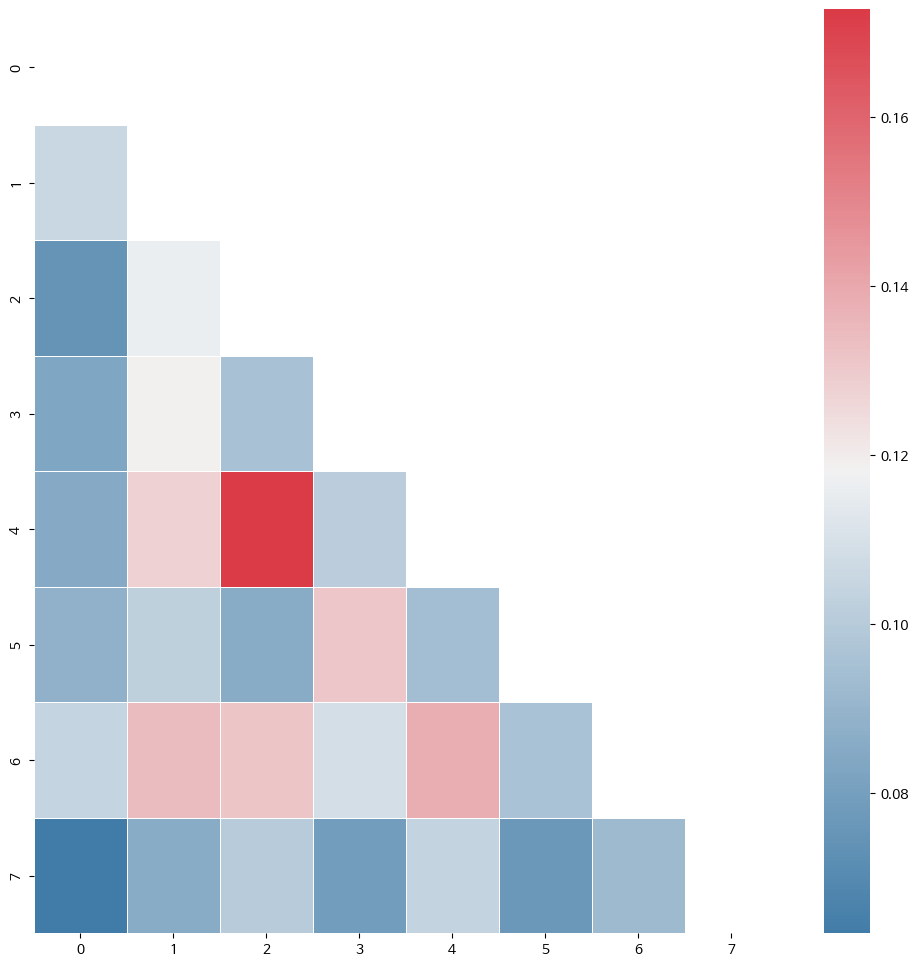

In [ ]:
def sim_heatmap(sim_df):
    cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
    plt.figure(figsize=(12,12))
    mask = np.zeros_like(sim_df, dtype=np.bool_)
    mask[np.triu_indices_from(mask)]=True
    sns.heatmap(sim_df, annot=False, cmap=cmap, mask=mask,
               linewidths=0.5, fmt='.2f', annot_kws={'size':8})
    plt.show()
sim_heatmap(sim_pair)

In [ ]:
# 데이터 불러오기
total_train = pd.read_csv('/content/drive/MyDrive/data/total_train_real.csv')
total_test = pd.read_csv('/content/drive/MyDrive/data/total_test_real.csv')

In [ ]:
total_train

,Unnamed: 0,Sentence,Emotion
0,0,얘네는 댓글만 보면 중국가수네,놀람
1,1,니들이 1~2년 쓰다가 고장나는건 폰을 개떡같이 쓰니까 그런거야 펴엉신들아ㅉㅉ앱등이 수준,혐오
2,2,항상 감사합니다 용규선수ㅠㅠㅠㅠ,행복
3,3,박근혜와 친박 개누리들이 버틴다면 세자릿수도 가능할듯,혐오
4,4,질싸?,혐오
...,...,...,...
57838,51613,부모님이 내가 밖에 나가려고만 하면 간섭을 하셔. 속상해.,당황
57839,51614,부모님은 나에게 관심도 없어. 내가 무슨 말을 하든 다 잊어버리는 것 같아서 짜증 나.,불안
57840,51615,내가 지금 할 수 있는 건 아무것도 없어. 아내는 계속 아르바이트라도 알아보라고 해.,슬픔
57841,51616,결혼 후 독립에 대한 양가 부모님의 생각이 달라. 어떻게 하면 좋을지 모르겠어.,당황


In [ ]:
# 필요없는 컬럼 제거
total_train.drop('Unnamed: 0', axis=1, inplace=True)
total_train.head(3)

,Sentence,Emotion
0,얘네는 댓글만 보면 중국가수네,놀람
1,니들이 1~2년 쓰다가 고장나는건 폰을 개떡같이 쓰니까 그런거야 펴엉신들아ㅉㅉ앱등이 수준,혐오
2,항상 감사합니다 용규선수ㅠㅠㅠㅠ,행복


In [ ]:
total_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57843 entries, 0 to 57842
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  57843 non-null  object
 1   Emotion   57843 non-null  object
dtypes: object(2)
memory usage: 903.9+ KB


결측치 없음, 총 57843개의 데이터

In [ ]:
total_test

,Unnamed: 0,Sentence,Emotion
0,0,지디게이 죽여 없애야됨,혐오
1,1,친일파들을 죽여라~,혐오
2,2,착각들 하는데 얼굴이 큰거랑 머리가 큰거는 다른뎅,중립
3,3,개 씝 극우 쪽빠리 수장 새끼,혐오
4,4,삼성이 돈을 조금더 벌려고 싸구려 중국산 밧데리 장착했다가 개망신 당하는구나!,분노
...,...,...,...
11113,6636,나랑 비슷한 시기에 결혼하는 친구는 시댁에서 집을 해줘서 너무 부러워. 우리는 대출...,당황
11114,6637,친구 한 명이 결혼해서 아이를 가졌는데 너무 행복해 보이더라. 기분이 좋지만은 않아.,당황
11115,6638,남들은 결혼 전에 일억을 모았다는데 난 뭐를 한 것인지 모르겠어. 자괴감만 드네.,당황
11116,6639,나보다 결혼을 먼저 한 친구가 부러워. 그 친구 남편은 직장도 내 남편보다 좋고 키...,당황


In [ ]:
# 필요없는 컬럼 제거
total_test.drop('Unnamed: 0', axis=1, inplace=True)
total_test.head(3)

,Sentence,Emotion
0,지디게이 죽여 없애야됨,혐오
1,친일파들을 죽여라~,혐오
2,착각들 하는데 얼굴이 큰거랑 머리가 큰거는 다른뎅,중립


In [ ]:
total_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11118 entries, 0 to 11117
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  11118 non-null  object
 1   Emotion   11118 non-null  object
dtypes: object(2)
memory usage: 173.8+ KB


결측치 없음, 총 11118개의 데이터

In [ ]:
# 훈련/테스트 데이터의 감정별 데이터 개수
total_train.Emotion.value_counts()

분노    8931
슬픔    8724
혐오    5922
행복    4822
놀람    4716
불안    4598
상처    4395
공포    4373
당황    4248
중립    3870
기쁨    3244
Name: Emotion, dtype: int64

In [ ]:
total_test.Emotion.value_counts()

분노    1728
슬픔    1568
혐오    1450
행복    1215
놀람    1182
공포    1095
중립     960
당황     521
기쁨     517
상처     451
불안     431
Name: Emotion, dtype: int64

In [ ]:
a = total_train['Emotion'].value_counts()

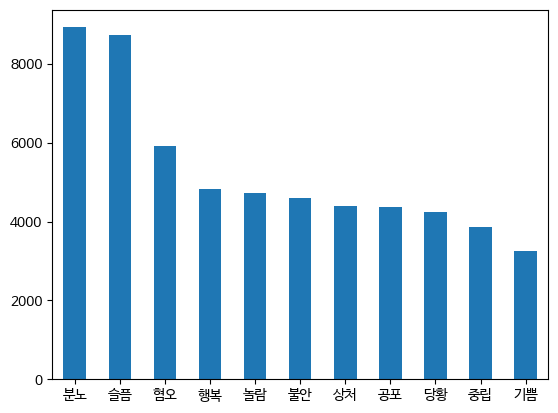

In [ ]:
# 학습데이터셋의 감정별 데이터 개수 시각화
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

a.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

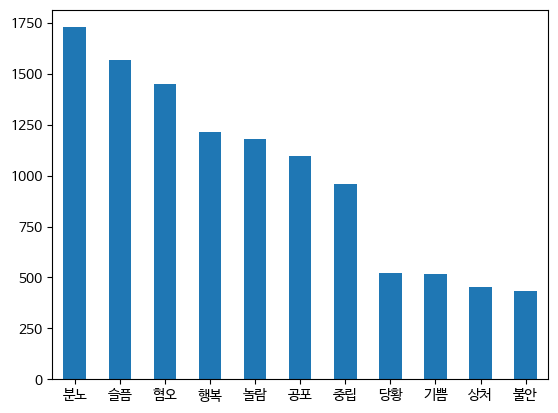

In [ ]:
# 테스트데이터셋의 감정별 데이터 개수 시각화
b = total_test.Emotion.value_counts()
b.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

- 학습 데이터와 테스트 데이터 모두 감정별 데이터 분포가 고르지 않음.
- 여러 데이터셋을 합쳐서 새로운 데이터셋을 만들었기 때문.

<strong>문장별 길이 카운트

In [ ]:
# 문장별 길이 카운트해서 새로운 컬럼으로 생성
total_train['len_count'] = 0
for i in range(len(total_train)):
  a = len(total_train.Sentence[i])
  total_train['len_count'][i] = a

<ipython-input-41-1561261894e1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_train['len_count'][i] = a


In [ ]:
total_train

,Sentence,Emotion,len_count
0,얘네는 댓글만 보면 중국가수네,놀람,16
1,니들이 1~2년 쓰다가 고장나는건 폰을 개떡같이 쓰니까 그런거야 펴엉신들아ㅉㅉ앱등이 수준,혐오,49
2,항상 감사합니다 용규선수ㅠㅠㅠㅠ,행복,17
3,박근혜와 친박 개누리들이 버틴다면 세자릿수도 가능할듯,혐오,29
4,질싸?,혐오,3
...,...,...,...
57838,부모님이 내가 밖에 나가려고만 하면 간섭을 하셔. 속상해.,당황,32
57839,부모님은 나에게 관심도 없어. 내가 무슨 말을 하든 다 잊어버리는 것 같아서 짜증 나.,불안,48
57840,내가 지금 할 수 있는 건 아무것도 없어. 아내는 계속 아르바이트라도 알아보라고 해.,슬픔,47
57841,결혼 후 독립에 대한 양가 부모님의 생각이 달라. 어떻게 하면 좋을지 모르겠어.,당황,44


In [ ]:
total_test['len_count'] = 0

In [ ]:
for i in range(len(total_test)):
  a = len(total_test.Sentence[i])
  total_test['len_count'][i] = a

<ipython-input-44-5368111a2535>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_test['len_count'][i] = a


In [ ]:
total_test

,Sentence,Emotion,len_count
0,지디게이 죽여 없애야됨,혐오,12
1,친일파들을 죽여라~,혐오,10
2,착각들 하는데 얼굴이 큰거랑 머리가 큰거는 다른뎅,중립,27
3,개 씝 극우 쪽빠리 수장 새끼,혐오,16
4,삼성이 돈을 조금더 벌려고 싸구려 중국산 밧데리 장착했다가 개망신 당하는구나!,분노,43
...,...,...,...
11113,나랑 비슷한 시기에 결혼하는 친구는 시댁에서 집을 해줘서 너무 부러워. 우리는 대출...,당황,52
11114,친구 한 명이 결혼해서 아이를 가졌는데 너무 행복해 보이더라. 기분이 좋지만은 않아.,당황,47
11115,남들은 결혼 전에 일억을 모았다는데 난 뭐를 한 것인지 모르겠어. 자괴감만 드네.,당황,45
11116,나보다 결혼을 먼저 한 친구가 부러워. 그 친구 남편은 직장도 내 남편보다 좋고 키...,당황,60


In [ ]:
total_train.groupby('len_count').size()

len_count
2         7
3        26
4        65
5       147
6       231
       ... 
332       1
378       1
467       1
526       1
1000      1
Length: 196, dtype: int64

In [ ]:
total_test.groupby('len_count').size()

len_count
2       3
3       5
4      19
5      41
6      56
       ..
238     1
283     1
295     1
320     1
378     1
Length: 133, dtype: int64

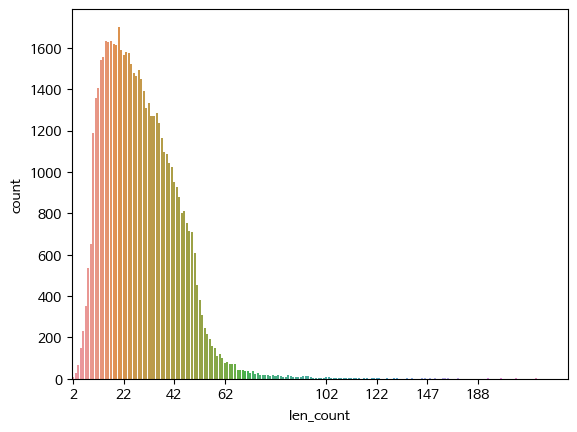

In [ ]:
# 학습데이터 문장 길이 분포
import seaborn as sns
sns.countplot(x='len_count', data = total_train)
plt.xticks([0, 20, 40, 60, 100, 120, 140, 160])
plt.show()

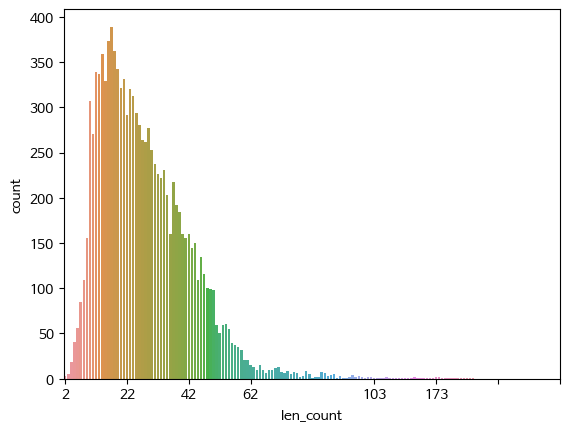

In [ ]:
# 테스트 데이터 문장 길이 분포
sns.countplot(x='len_count', data = total_test)
plt.xticks([0, 20, 40, 60, 100, 120, 140, 160])
plt.show()